# Water Quality in Kern County 

This notebook creates a water index to better understand those tracts which have the worst water quality in the county. Given that our previous maps showed a seemingly contradictory relationship between health outcomes and oil extraction, we are pivoting towards understanding what other factors that could possibly link polluting sources such as oil with health outcomes. 

In [53]:
import pandas as pd
import numpy as np
import seaborn
import folium

In [54]:
import geopandas as gpd

In [55]:
import contextily as cx
import matplotlib.pyplot as plt
import plotly.express as px

Here I read the calenviroscreen file with census and water quality data, subsetting it to Kern County, projecting it, and getting rid of columns I don't need.

In [56]:
gdf = gpd.read_file('data/CES4 Final Shapefile.shp',
                   dtype= {
        'Tract':str,
    }, crs = "EPSG:4326")

In [57]:
gdf_kern = gdf.loc[gdf['County'] == 'Kern'] #subsets data to just include Kern County
gdf_kern.sample()


,Tract,ZIP,County,ApproxLoc,TotPop19,CIscore,CIscoreP,Ozone,OzoneP,PM2_5,...,Elderly65,Hispanic,White,AfricanAm,NativeAm,OtherMult,Shape_Leng,Shape_Area,AAPI,geometry
1487,6.029006e+09,93505,Kern,California City,4414,24.720392,48.171962,0.062365,88.69944,6.555168,...,13.208,24.5356,38.6951,30.1767,0.2719,5.188,89242.528592,1.842069e+08,1.1328,"POLYGON ((186168.076 -310919.973, 186209.819 -..."


In [58]:
gdf_kern.dtypes

Tract          float64
ZIP              int64
County          object
ApproxLoc       object
TotPop19         int64
                ...   
OtherMult      float64
Shape_Leng     float64
Shape_Area     float64
AAPI           float64
geometry      geometry
Length: 67, dtype: object

In [59]:
gdf_kern = gdf_kern.to_crs("EPSG:4326")

<AxesSubplot: >

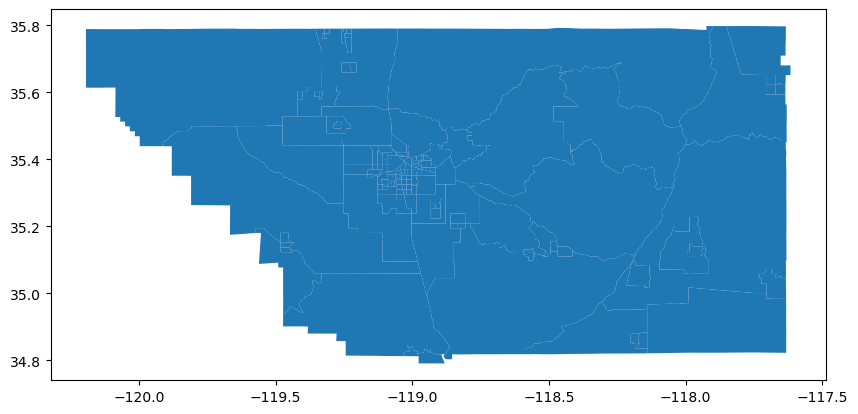

In [60]:
gdf_kern.plot(figsize=(10,10))

In [61]:
#subsetting data further by column 
#'Tract','TotPop19', 'PesticideP','Tox_Rel_P', 'DrinkWat', 
                #'DrinkWatP', 'Lead_P', 'CleanupP', 'GWThreatP', 
                #    'HazWasteP', 'ImpWatBod', 'ImpWatBodP', 'SolWasteP', 
                 #     'PolBurdSc', 'PolBurdP', 'Asthma', 
                  #   'AsthmaP', 'LowBirWP','CardiovasP',
       #  'Poverty','Hispanic', 'White', 'AfricanAm',
        #             'NativeAm', 'OtherMult',
gdf_ksub = gdf_kern[['TotPop19', 'ApproxLoc','GWThreat', 'GWThreatP','ImpWatBod','ImpWatBodP', 'DrinkWatP','DrinkWat', 'PolBurdSc', 'Tract', 'Shape_Leng', 'Shape_Area', 'geometry']]
gdf_ksub.sample(1)

,TotPop19,ApproxLoc,GWThreat,GWThreatP,ImpWatBod,ImpWatBodP,DrinkWatP,DrinkWat,PolBurdSc,Tract,Shape_Leng,Shape_Area,geometry
1408,6255,Ridgecrest,62.05,92.877304,0.0,0.0,51.529911,439.402571,4.727288,6.029005e+09,10266.480656,5.306076e+06,"POLYGON ((-117.66993 35.65158, -117.66987 35.6..."


In [62]:
gdf_ksub.sample(10)

,TotPop19,ApproxLoc,GWThreat,GWThreatP,ImpWatBod,ImpWatBodP,DrinkWatP,DrinkWat,PolBurdSc,Tract,Shape_Leng,Shape_Area,geometry
1519,5021,Old Stine,0.0,0.000000,0.0,0.000000,71.599850,642.680954,5.578611,6.029003e+09,5533.991037,1.595337e+06,"POLYGON ((-119.03967 35.35414, -119.03971 35.3..."
1406,4300,Oildale,5.0,30.881620,0.0,0.000000,74.847009,677.296351,6.748344,6.029000e+09,11642.813435,3.167584e+06,"POLYGON ((-119.05053 35.41280, -119.04995 35.4..."
1528,10772,Bakersfield,1.5,10.642537,0.0,0.000000,87.386037,780.031774,7.065495,6.029002e+09,12598.101095,6.681875e+06,"POLYGON ((-118.91424 35.35830, -118.91418 35.3..."
1448,4522,Unincorporated Kern County area,38.5,85.273120,3.0,33.158337,99.837642,1086.747907,5.140262,6.029005e+09,335809.692790,2.491828e+09,"POLYGON ((-117.90713 35.78697, -117.91146 35.7..."
1498,4199,Unincorporated Kern County area,13.0,54.524323,0.0,0.000000,92.806294,793.552723,5.703225,6.029003e+09,177890.535308,1.073976e+09,"POLYGON ((-118.97126 35.05814, -118.97060 35.0..."
1552,12972,Unincorporated Kern County area,34.0,82.649842,0.0,0.000000,96.203322,842.251084,7.639872,6.029000e+09,19753.257458,2.048590e+07,"POLYGON ((-119.05011 35.41948, -119.05532 35.4..."
1505,3697,Bakersfield,0.0,0.000000,0.0,0.000000,70.313476,625.120478,6.134254,6.029002e+09,5599.913226,1.726553e+06,"POLYGON ((-119.03004 35.35250, -119.03968 35.3..."
1493,14840,Unincorporated Kern County area,28.9,78.598705,0.0,0.000000,96.590483,859.167174,7.370570,6.029005e+09,147649.845976,5.432491e+08,"POLYGON ((-119.05344 35.79061, -119.05319 35.7..."
1474,2728,Bakersfield Country Club,0.0,0.000000,0.0,0.000000,94.692144,814.341505,4.672516,6.029001e+09,6545.591170,2.731549e+06,"POLYGON ((-118.93021 35.38334, -118.94966 35.3..."
1482,3878,Unincorporated Kern County area,0.0,0.000000,0.0,0.000000,95.691270,828.706964,2.823799,6.029006e+09,38177.084957,4.604939e+07,"POLYGON ((-118.55575 35.21506, -118.55494 35.2..."


Below, I have created two choropleth maps, using drinking water contaminants percentile and groundwater threat percentile, respectively. The first map, using drinking water contaminants data shows a higher percentile around Bakersfield, with the lowest percentiles within the city and the far east of the county. 

(-120.32304985038697,
 -117.48729714999462,
 34.74025035045479,
 35.848580649530376)

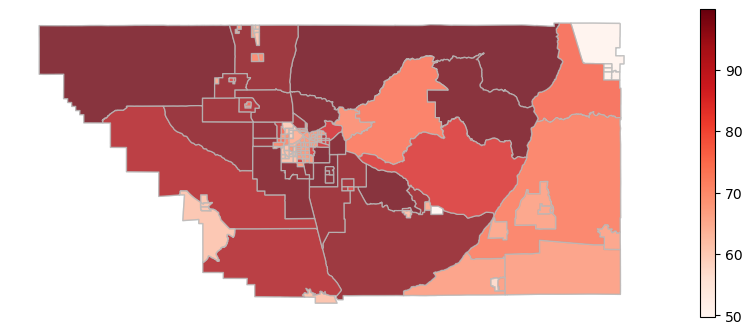

In [63]:
fig,ax = plt.subplots(figsize=(12,4))

gdf_ksub.plot(ax=ax,alpha=0.6,edgecolor='#bbb',facecolor='white')

gdf_ksub.plot(ax=ax,column='DrinkWatP',edgecolor='#bbb',legend=True,cmap='Reds',alpha=0.8)

ax.axis('off')

The groundwater threat percentile map shows an unclear picture of how groundwater threats are concentrated, besides the western part of the county which is where oil extraction occurs. However, there are also higher percentile tracts in the northeast and southeast tracts as well, raising questions about other factors that are contributing to groundwater issues.

(-120.32304985038697,
 -117.48729714999462,
 34.74025035045479,
 35.848580649530376)

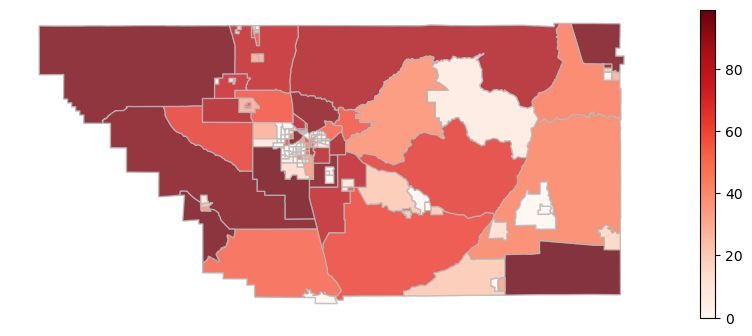

In [64]:
fig,ax = plt.subplots(figsize=(12,4))

gdf_ksub.plot(ax=ax,alpha=0.6,edgecolor='#bbb',facecolor='white')

gdf_ksub.plot(ax=ax,column='GWThreatP',edgecolor='#bbb',legend=True,cmap='Reds',alpha=0.8)

ax.axis('off')

I reclassify each column into 5 segments divided through natural breaks to form an index that combines both of them to see which tracts experience the greatest drinking water and groundwater issues combined.

In [65]:
n_classes = 5

In [70]:
pip install -U pysal


Note: you may need to restart the kernel to use updated packages.


In [71]:
n_classes

5

In [72]:
import pysal.viz.mapclassify as mc

In [73]:
classifier = mc.NaturalBreaks.make(k=n_classes)


In [74]:
classifications = gdf_ksub[['GWThreatP']].apply(classifier)

In [75]:
classifications.head()

,GWThreatP
1402,0
1403,4
1404,3
1405,2
1406,1


In [76]:
classifications.rename(columns = {'GWThreatP':'GWIndex'}, inplace = True)


I join the new index column to my original dataframe

In [77]:
gdf_ksub = gdf_ksub.join(classifications)


In [78]:
gdf_ksub.head()

,TotPop19,ApproxLoc,GWThreat,GWThreatP,ImpWatBod,ImpWatBodP,DrinkWatP,DrinkWat,PolBurdSc,Tract,Shape_Leng,Shape_Area,geometry,GWIndex
1402,5613,Bakersfield,0.00,0.000000,0.0,0.0,65.280380,558.112624,4.624702,6.029002e+09,12653.176612,4.995807e+06,"POLYGON ((-119.05790 35.36334, -119.05957 35.3...",0
1403,2923,Bakersfield,67.20,93.807073,0.0,0.0,99.625328,1022.632112,7.456522,6.029006e+09,68740.430761,8.921771e+07,"POLYGON ((-118.87860 35.32540, -118.87848 35.2...",4
1404,1963,Shafter,15.25,59.887099,0.0,0.0,97.127513,884.548156,7.109130,6.029004e+09,76205.507941,2.199447e+08,"POLYGON ((-119.14280 35.55784, -119.14115 35.5...",3
1405,3739,Bakersfield,7.50,39.448780,0.0,0.0,70.313476,625.120478,6.680140,6.029002e+09,8691.608218,3.686952e+06,"POLYGON ((-119.02470 35.38257, -119.02468 35.3...",2
1406,4300,Oildale,5.00,30.881620,0.0,0.0,74.847009,677.296351,6.748344,6.029000e+09,11642.813435,3.167584e+06,"POLYGON ((-119.05053 35.41280, -119.04995 35.4...",1


In [79]:
classifications2 = gdf_ksub[['DrinkWatP']].apply(classifier)

In [80]:
classifications2.head()

,DrinkWatP
1402,1
1403,4
1404,4
1405,2
1406,2


In [81]:
classifications2.rename(columns = {'DrinkWatP':'DrinkIndex'}, inplace = True)


In [82]:
gdf_ksub = gdf_ksub.join(classifications2)


In [83]:
gdf_ksub.head()

,TotPop19,ApproxLoc,GWThreat,GWThreatP,ImpWatBod,ImpWatBodP,DrinkWatP,DrinkWat,PolBurdSc,Tract,Shape_Leng,Shape_Area,geometry,GWIndex,DrinkIndex
1402,5613,Bakersfield,0.00,0.000000,0.0,0.0,65.280380,558.112624,4.624702,6.029002e+09,12653.176612,4.995807e+06,"POLYGON ((-119.05790 35.36334, -119.05957 35.3...",0,1
1403,2923,Bakersfield,67.20,93.807073,0.0,0.0,99.625328,1022.632112,7.456522,6.029006e+09,68740.430761,8.921771e+07,"POLYGON ((-118.87860 35.32540, -118.87848 35.2...",4,4
1404,1963,Shafter,15.25,59.887099,0.0,0.0,97.127513,884.548156,7.109130,6.029004e+09,76205.507941,2.199447e+08,"POLYGON ((-119.14280 35.55784, -119.14115 35.5...",3,4
1405,3739,Bakersfield,7.50,39.448780,0.0,0.0,70.313476,625.120478,6.680140,6.029002e+09,8691.608218,3.686952e+06,"POLYGON ((-119.02470 35.38257, -119.02468 35.3...",2,2
1406,4300,Oildale,5.00,30.881620,0.0,0.0,74.847009,677.296351,6.748344,6.029000e+09,11642.813435,3.167584e+06,"POLYGON ((-119.05053 35.41280, -119.04995 35.4...",1,2


I then add both index columns to together to equal an index out of ten

In [84]:
gdf_ksub["Water_Index"] = gdf_ksub['GWIndex'] + gdf_ksub["DrinkIndex"]


In [85]:
gdf_ksub.head()

,TotPop19,ApproxLoc,GWThreat,GWThreatP,ImpWatBod,ImpWatBodP,DrinkWatP,DrinkWat,PolBurdSc,Tract,Shape_Leng,Shape_Area,geometry,GWIndex,DrinkIndex,Water_Index
1402,5613,Bakersfield,0.00,0.000000,0.0,0.0,65.280380,558.112624,4.624702,6.029002e+09,12653.176612,4.995807e+06,"POLYGON ((-119.05790 35.36334, -119.05957 35.3...",0,1,1
1403,2923,Bakersfield,67.20,93.807073,0.0,0.0,99.625328,1022.632112,7.456522,6.029006e+09,68740.430761,8.921771e+07,"POLYGON ((-118.87860 35.32540, -118.87848 35.2...",4,4,8
1404,1963,Shafter,15.25,59.887099,0.0,0.0,97.127513,884.548156,7.109130,6.029004e+09,76205.507941,2.199447e+08,"POLYGON ((-119.14280 35.55784, -119.14115 35.5...",3,4,7
1405,3739,Bakersfield,7.50,39.448780,0.0,0.0,70.313476,625.120478,6.680140,6.029002e+09,8691.608218,3.686952e+06,"POLYGON ((-119.02470 35.38257, -119.02468 35.3...",2,2,4
1406,4300,Oildale,5.00,30.881620,0.0,0.0,74.847009,677.296351,6.748344,6.029000e+09,11642.813435,3.167584e+06,"POLYGON ((-119.05053 35.41280, -119.04995 35.4...",1,2,3


A choropleth map of the combined water index reveals that the tracts around Bakersfield experience the worst water quality. The tracts in the northwest and west of the county also feature the highest concentration of oil extraction and agricultural land use. Additionally, we know that tracts immediately south of Bakersfield also experience the greatest concentrations of pesticides, possibly due to the direction of waterways. These tracts also experience among the worst water quality in the county. What remains unclear is why some smaller tracts, particularly those surrounded by tracts with poor water quality, do not register as similar on the water index. This will require a more granular analysis of the waterways as well as an analysis of point pollution that affects the water system. Interestingly, the eastern portion of the county fares relatively better for water quality. The question then remains what other factors are contributing to poor health outcomes concentrated in the east of the county. 

(-120.32304985038697,
 -117.48729714999462,
 34.74025035045479,
 35.848580649530376)

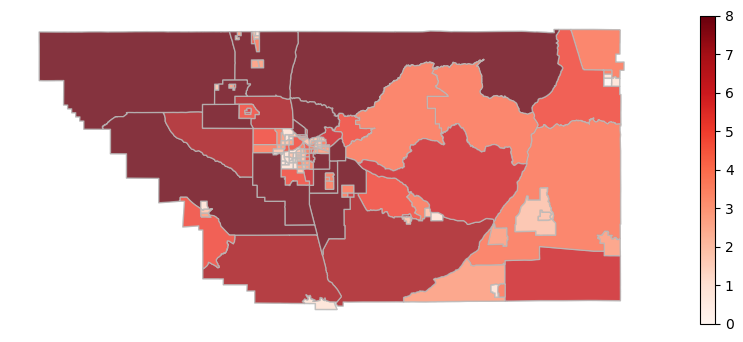

In [86]:
fig,ax = plt.subplots(figsize=(12,4))

gdf_ksub.plot(ax=ax,alpha=0.6,edgecolor='#bbb',facecolor='white')

gdf_ksub.plot(ax=ax,column='Water_Index',edgecolor='#bbb',legend=True,cmap='Reds',alpha=0.8)

ax.axis('off')